<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 >Week 20 Lab</h1>
</div>

# Part 1

For part one, we're going to be using the following code:

(reference week-19 for help with this)

In [1]:
# our sql script

import sqlite3
from contextlib import closing

db = 'week-20-lab.db'

def connection(db_name=None):
    conn = None
    try:
        db_name = db_name or ':memory:'
        conn = sqlite3.connect(db_name)
        return conn
    except Exception as e:
        print(e)

def execute(db, cmd, commit=False, args=[]):
    with closing(connection(db)) as conn:
        with closing(conn.cursor()) as cursor:
            try:
                cur = cursor.execute(cmd).fetchall()
                if commit:
                    conn.commit()
                else:
                    return cur
            except Exception as e:
                print(e)    
                
def get_tables(db):
    rows = execute(db, "SELECT name from sqlite_master where type='table';")
    return [i[0] for i in rows]

def get_cols(db, table):
    return execute(db, f"pragma table_info({table});")

a. Create a table called 'students' with the following columns:
* first_name (string)
* last_name (string)
* course (string)

In [2]:
execute(db, 'CREATE TABLE students (first_name VARCHAR(20) NOT NULL, last_name VARCHA(20)NOT NULL, course VARCHAR(25) NOT NULL);',\
        commit=True)

table students already exists


b. Add 30 students to your table. 15 of them taking the course 'progressive web' and 15 taking 'data science'. 

In [5]:
from faker import Faker

fake = Faker()

#do this if condition == something esle do that
for i in range(30):
    execute(db, "INSERT INTO students VALUES (?,?,?);", commit = True, args=(fake.first_name(),fake.last_name(),"progressive web" if i <15 else "data science") )

execute(db, "SELECT * FROM students;")

ModuleNotFoundError: No module named 'faker'

c. One of the students from the data science course got hired! Show the SQL command that will remove this student from the table and then remove them. 

In [ ]:
execute(db, "DELETE FROM students WHERE first_name =  'Joseph' and last_name = 'Bennett';", \
    commit=True)

d. Two students named Bill Gates and Elon Musk tested into phase 2 for progressive web. Write the SQL command that will add them to the table and then add them.

In [ ]:
execute(db, "INSERT INTO students VALUES ('Elon','Musk",'progressive web'), \
    commit=True)
execute(db, "INSERT INTO students VALUES ('Bill','Gates",'progressive web'), \
    commit=True)

e. Elon Musk would like to go by a new name: 'XÆ Dogecoin-12'. Show the SQL command that would change his name and then run it. 

In [ ]:
execute(db, "UPDATE students SET first_name=XÆ, last_name=Dogecoin-12) WHERE first_name = 'Elon' and last_name = 'Musk';", \
    commit=True)


f. Show the command that would allow us to see only the students who are part of the course `data science`.

In [ ]:
execute(db, "SELECT * FROM students WHERE course='data science';")

# Part 2

The following section uses the `unknown.csv` dataset located in `../datasets/`

a. Import and analyze the dataset. Make sure you do the following:

* read the csv file in as a `df`.

In [2]:
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



df = pd.read_csv('../datasets/unknown.csv')
df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


* output the top of the `df`.

In [8]:
df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


* output the columns.

In [9]:
df.columns


Index(['x', 'y'], dtype='object')

* show the shape of the `df`

In [10]:
df.shape


(300, 2)

* show the info.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
x    300 non-null int64
y    300 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


* check if we're missing any data and handle it.

In [13]:
df.isnull().sum()

x    0
y    0
dtype: int64

* chart the data so we can visualize any relationships

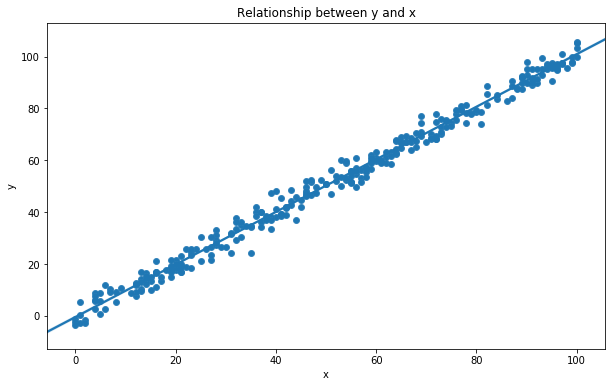

In [25]:

# Set the width and height of the figure
plt.figure(figsize=(10,6))

plt.title('Relationship between y and x')

sns.scatterplot(x=df['x'], y=df['y'])

sns.regplot(x=df['x'], y=df['y'])
plt.show

* show the covariance and correlation matrixes (including heatmap if you'd like).

Correlation Matrix


Text(69.0, 0.5, 'Y')

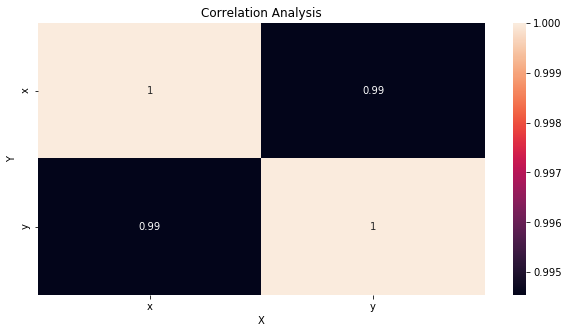

In [30]:
#Correlation Matrix
print("Correlation Matrix")
df.corr()

# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Correlation Analysis")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=df.corr(), annot=True)

# Add label for horizontal axis
plt.xlabel("X")
plt.ylabel("Y")

b. Train a linear regression model using week-20-class-2 as reference. We'd like to predict column `y`.

Make sure to do the following:
* Separate values into `X` and `Y` variables.

In [17]:
import sklearn as sk
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

y = df['y']
X = df['x']

x = np.array(X).reshape(-1,1)
y = np.array(y)



# x = np.array(df['x']).reshape((-1, 1))
# y = np.array(df['y']).reshape((-1, 1))

model = reg.fit(x, y)
# help(reg.fit)

# predicted y

y_predicted = model.predict(x)
print('First 10 Predicted Y:'f"{y_pred[:10]}")

# Calculating R-squared
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

First 10 Predicted Y:[77.64201157 20.83923168 21.85356704 19.82489633 36.05426201 14.75321955
 62.42698124 95.90004796 19.82489633  4.609866  ]
coefficient of determination: 0.9891203611402716
intercept: -0.4618107736611776
slope: [1.01433536]


* Generate training and test data for `X` and `Y` using `train_test_split` (with a test size of 20%)

In [4]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


* Create an instance of the `LinearRegression` class and run the regression.

In [5]:
model = reg.fit(x_train, y_train.reshape(-1,1))

* Output the score of the regression.

In [7]:
r_square = model.score(x_train, y_train)
print('coefficient of determination:', r_square)

coefficient of determination: 0.9894012371962942


* Chart the data.

Coefficient of determination or R-square: 
 0.9893876596153163
Coefficients: 
 [1.01433536]
Intercept: 
 -0.4618107736611776


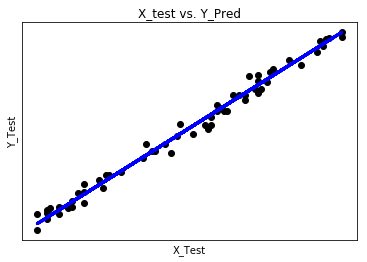

In [24]:
# Gettin Predicted Y
y_pred = model.predict(x_test)

# The coefficients
print('Coefficient of determination or R-square: \n', model.score(x_train, y_train))
print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

# Add title
plt.title("X_test vs. Y_Pred")

# Add label for horizontal axis
plt.xlabel("X_Test")
plt.ylabel("Y_Test")

plt.xticks(())
plt.yticks(())

plt.show()
# 
####--------------------------




* Bonus: what was the y-intercept and slope? Use the documentation to find this information out.

# Part 3

Using a dataset of your choosing (try kaggle if stuck). Set up and run a linear regression on the data using the steps from Part 2. Don't worry if your results are inconclusive (it happens). Demonstrate that you're able to do it.

In [30]:
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn as sk
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

from sklearn.model_selection import train_test_split

# Importing Real Estate Date into dataframe

re = pd.read_csv('../datasets/Real estate.csv')
re.head()



,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [26]:
re.info() #Examining dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [37]:
# Checking for missing values
print('Number of Missing Values in Dataset: \n', re.isnull().sum())

# Checking for duplicates
print('Number of Duplicates: \n', re.duplicated().sum())







Number of Missing Values in Dataset: 
 No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64
Number of Duplicates: 
 0


In [62]:
# Preparing datasets
# Y: Response Variable --> price_sqf

Y = re["Y house price of unit area"]

X = re.drop(columns=["Y house price of unit area","No","X1 transaction date"])

# checking for missing in Y

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [63]:
# setup model: Fitting Linear Regression with training data

model = reg.fit(x_train, y_train)

In [67]:
#Printing R_square, Coefficients, intercept

# Gettin Predicted Y
y_pred = model.predict(x_test)

# The coefficients
print('Coefficient of determination or R-square: \n', model.score(x_train, y_train))
print('Coefficients \n', model.coef_)
print('Intercept: \n', model.intercept_)


print("The linear model is: Y = {:.5} + {:.5}*house_age + {:.5}*distace_to_trans + {:.5}*no_convinience_store + {:.5}*latitude + {:.5}*longitude".format(model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3], model.coef_[4]))

Coefficient of determination or R-square: 
 0.6280355584895383
Coefficients 
 [-2.67107767e-01 -3.41879244e-03  1.44990322e+00  2.53678849e+02
  2.19735631e+01]
Intercept: 
 -8963.950617687748
The linear model is: Y = -8964.0 + -0.26711*house_age + -0.0034188*distace_to_trans + 1.4499*no_convinience_store + 253.68*latitude + 21.974*longitude


In [69]:

# To print out all regression output including statistical tests

import statsmodels.api as sm


X2_train = sm.add_constant(x_train)
est = sm.OLS(y_train, X2_train)
est2 = est.fit()
print(est2.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.628
Model:                                    OLS   Adj. R-squared:                  0.622
Method:                         Least Squares   F-statistic:                     109.7
Date:                        Sun, 14 Feb 2021   Prob (F-statistic):           1.27e-67
Time:                                17:23:41   Log-Likelihood:                -1164.1
No. Observations:                         331   AIC:                             2340.
Df Residuals:                             325   BIC:                             2363.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------